# MNIST数据集图片分类
- 作为我git的开始篇章，一周一更，希望自己说到做到，记录下我自己的学习历程
- 2019年5月21日

# 1.导入MNIST图片数据集

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
# 利用TensorFlow自动下载MNIST
mnist = input_data.read_data_sets('F:/learnpy/LearnTensorflow/Mnist_clf/MNIST_data/',one_hot=True)

E:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting F:/learnpy/LearnTensorflow/Mnist_clf/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting F:/learnpy/LearnTensorflow/Mnist_clf/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting F:/learnpy/LearnTensorflow/Mnist_clf/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting F:/learnpy/LearnTensorflow/Mnist_clf/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
print('输入数据：',mnist.train.images)
print('数据shape：',mnist.train.images.shape)

输入数据： [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
数据shape： (55000, 784)


- MNIST数据集中的图片是28*28 Pixel，每一幅图片在one-hot编码后成为1*784的数据

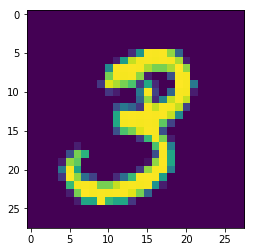

In [5]:
import pylab
im = mnist.train.images[1]
im = im.reshape(-1,28)
pylab.imshow(im)
pylab.show()

# 2.分析图片特点、定义变量

- 输入图片是55000*784的矩阵，所以要创建一个[None,784]的占位符x和一个[None,10]的占位符y，然后利用feed机制将图片和label输入进去
- None表示张量的第一个维度可以是任意长度的，也就是说可以输入任意数量的图片

In [6]:
tf.reset_default_graph()
# 定义占位符
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])  

## 2.1模型构建

### 定义学习参数
- 模型的权重值W，和模型的偏置量b，因为是可修改的所以要用Variable来定义

In [7]:
W = tf.Variable(tf.random_normal([784,10]))
b = tf.Variable(tf.zeros([10]))

### 定义输出节点
- x是一个二维张量

In [8]:
pred = tf.nn.softmax(tf.matmul(x,W)+b)

### 定义反向传播结构
- （1）将生成的pred与样本标签y进行交叉熵的运算,然后取平均值
- （2）将结果作为误差值，通过梯度下降的优化方法进行W和b的更新

In [9]:
# 损失函数
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred),reduction_indices=1))
# 定义参数
learning_rate = 0.01
# 使用梯度下降优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

##  2.2训练模型并输出中间状态参数 
- training_epochs = 25 表示要把整个训练样本集迭代25次
- batch_size = 500 表示在训练过程中一次取500条数据进行训练
- display_step = 1 表示每一次就把具体的中间状态显示出来

In [18]:
training_epochs = 25
batch_size = 500
display_step = 5
saver = tf.train.Saver()
model_path = 'log/521model.ckpt'
# 启动Session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # 统一初始化operation
    # 通过循环开始训练
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # 循环所有数据集
        for i in range(total_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            # 运行优化器
            _,c = sess.run([optimizer,cost],feed_dict={x:batch_xs,y:batch_ys})
            # 计算平均loss值
            avg_cost += c / total_batch
            # 显示详细信息
            if (epoch + 1) % display_step == 0:   # 数据量的总数是55000，选取500的batch_size那么遍历一次数据集total_batch就会是110
                print('Epoch:','%04d'%(epoch+1),'cost=','{:.9f}'.format(avg_cost))
    print('Training Finished')
    
    # 测试 model
    correct_prediction = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
    # 计算准确率
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    print('Accracy:',accuracy.eval({x:mnist.test.images,y:mnist.test.labels}))
    
    # 保存模型
    save_path = saver.save(sess,model_path)
    print('Model saved in file:%s'% save_path)
                

Epoch: 0005 cost= 0.056413256
Epoch: 0005 cost= 0.108510663
Epoch: 0005 cost= 0.161317804
Epoch: 0005 cost= 0.217023113
Epoch: 0005 cost= 0.268697808
Epoch: 0005 cost= 0.323178439
Epoch: 0005 cost= 0.377003119
Epoch: 0005 cost= 0.429657403
Epoch: 0005 cost= 0.483142541
Epoch: 0005 cost= 0.535700668
Epoch: 0005 cost= 0.590302831
Epoch: 0005 cost= 0.644586268
Epoch: 0005 cost= 0.699359889
Epoch: 0005 cost= 0.751665722
Epoch: 0005 cost= 0.803001482
Epoch: 0005 cost= 0.853960276
Epoch: 0005 cost= 0.905032995
Epoch: 0005 cost= 0.956523340
Epoch: 0005 cost= 1.012127907
Epoch: 0005 cost= 1.063811627
Epoch: 0005 cost= 1.115534280
Epoch: 0005 cost= 1.165168095
Epoch: 0005 cost= 1.218247418
Epoch: 0005 cost= 1.269826312
Epoch: 0005 cost= 1.320388742
Epoch: 0005 cost= 1.365361465
Epoch: 0005 cost= 1.416217579
Epoch: 0005 cost= 1.468465827
Epoch: 0005 cost= 1.518720323
Epoch: 0005 cost= 1.573312248
Epoch: 0005 cost= 1.626142823
Epoch: 0005 cost= 1.676371210
Epoch: 0005 cost= 1.727629189
Epoch: 000

Epoch: 0015 cost= 1.750406354
Epoch: 0015 cost= 1.772922869
Epoch: 0015 cost= 1.792758135
Epoch: 0015 cost= 1.816523927
Epoch: 0015 cost= 1.838517484
Epoch: 0015 cost= 1.859130270
Epoch: 0015 cost= 1.879967195
Epoch: 0015 cost= 1.902371229
Epoch: 0015 cost= 1.924488295
Epoch: 0015 cost= 1.946516048
Epoch: 0015 cost= 1.968688596
Epoch: 0015 cost= 1.990768482
Epoch: 0015 cost= 2.013434241
Epoch: 0015 cost= 2.037429365
Epoch: 0015 cost= 2.062109882
Epoch: 0015 cost= 2.084041416
Epoch: 0015 cost= 2.104476747
Epoch: 0015 cost= 2.127684337
Epoch: 0015 cost= 2.151974479
Epoch: 0015 cost= 2.174514508
Epoch: 0015 cost= 2.195602233
Epoch: 0015 cost= 2.220041288
Epoch: 0015 cost= 2.242335510
Epoch: 0015 cost= 2.262966904
Epoch: 0015 cost= 2.287837928
Epoch: 0015 cost= 2.311425486
Epoch: 0015 cost= 2.331666361
Epoch: 0015 cost= 2.355706776
Epoch: 0015 cost= 2.377830815
Epoch: 0015 cost= 2.401096093
Epoch: 0015 cost= 2.424400106
Epoch: 0015 cost= 2.444103243
Epoch: 0015 cost= 2.465227439
Epoch: 001